In [1]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import parc
import scipy.cluster.hierarchy as sch
import matplotlib
from collections import defaultdict
import logging
import pickle
import scipy.sparse
import umap
from skimage import exposure

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import path for config
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

# Import path for src
module_path = str(Path.cwd().parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from config import *
import my_io as io

In [5]:
# Cmap
my_cmap_name = 'viridis'
scale_name = 'Relative Intensity'

#     my_cmap_name = 'bwr'
#     scale_name = 'Z-score'

# Import metadata information

In [6]:
df_metadata = pd.read_csv(data_dir / 'metadata.csv')
df_metadata.head()

,Pos,Grades,Stage,Directory
0,B1,2,I,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI001_B1
1,B3,2,I,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI005_B3
2,B5,2,II,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI006_B5
3,C6,AT,AT,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI007_C6
4,D7,3,IIIA,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI008_D7


In [7]:
datasets = df_metadata.Directory.to_list()
datasets = [name.split('\\')[-1] for name in datasets]

In [8]:
print(datasets)

['ROI001_B1', 'ROI005_B3', 'ROI006_B5', 'ROI007_C6', 'ROI008_D7', 'ROI009_D9', 'ROI012_E1', 'ROI015_B6', 'ROI016_F3', 'ROI017_F2', 'ROI018_G1', 'ROI019_G5', 'ROI020_E5', 'ROI021_E7']


In [9]:
pixels_bright_list = []
scaler = MinMaxScaler()
min_intensity = 0.2

for dataset in datasets:
    print(dataset)
    
    # Read images
    imgs, markers = io.read_img_down(dataset, data_ROI)
    for i in range(len(imgs)):
        img = imgs[i,:,:]
        p2, p98 = np.percentile(img, (0, 99.9))
        img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
        imgs[i,:,:] = img_rescale
        
    # change in data_frame
    df_pixels = pd.DataFrame(imgs.reshape(len(markers), -1).T, columns=markers)
    x_scaled = scaler.fit_transform(df_pixels)
    df_pixels_scaled = pd.DataFrame(x_scaled, columns=df_pixels.columns)
#     df_pixels_scaled.drop(['DNA1', 'DNA2', 'Histone3', 'MHCII', 'H3K9me3'], axis=1, inplace=True) 
    df_pixels_scaled = df_pixels_scaled[['ECadherin','PanKeratin','CD68','CD8a', 'CD4', 'FoxP3','Col1', 'SMA']]
    
    x, y = imgs[0].shape
    pixel_range = [i for i in range(x)]
    df_pixels_scaled['X'] = np.repeat(pixel_range, y)
    df_pixels_scaled['Y'] = [i for i in range(y)] * x
    
    # Only get pixels that are expressed
    pixel_dark = df_pixels_scaled.iloc[:,:-2].le(min_intensity).all(axis=1) # Last 2 columns correspond to X and y
    pixels_bright = df_pixels_scaled[~pixel_dark]
    pixels_bright['ROI'] = dataset
    
    pixels_bright_list.append(pixels_bright)    

ROI001_B1


<ipython-input-9-e013b67602f8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_bright['ROI'] = dataset


ROI005_B3


<ipython-input-9-e013b67602f8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_bright['ROI'] = dataset


ROI006_B5


<ipython-input-9-e013b67602f8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_bright['ROI'] = dataset


ROI007_C6


<ipython-input-9-e013b67602f8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_bright['ROI'] = dataset


ROI008_D7


<ipython-input-9-e013b67602f8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_bright['ROI'] = dataset


ROI009_D9


<ipython-input-9-e013b67602f8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_bright['ROI'] = dataset


ROI012_E1


<ipython-input-9-e013b67602f8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_bright['ROI'] = dataset


ROI015_B6


<ipython-input-9-e013b67602f8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_bright['ROI'] = dataset


ROI016_F3


<ipython-input-9-e013b67602f8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_bright['ROI'] = dataset


ROI017_F2


<ipython-input-9-e013b67602f8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_bright['ROI'] = dataset


ROI018_G1


<ipython-input-9-e013b67602f8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_bright['ROI'] = dataset


ROI019_G5


<ipython-input-9-e013b67602f8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_bright['ROI'] = dataset


ROI020_E5


<ipython-input-9-e013b67602f8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_bright['ROI'] = dataset


ROI021_E7


<ipython-input-9-e013b67602f8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixels_bright['ROI'] = dataset


In [10]:
df = pd.concat(pixels_bright_list)

In [11]:
df.columns

Index(['ECadherin', 'PanKeratin', 'CD68', 'CD8a', 'CD4', 'FoxP3', 'Col1',
       'SMA', 'X', 'Y', 'ROI'],
      dtype='object')

# Clustering

In [39]:
def clustering_parc(X, small_pop=1000):
#     parc1 = parc.PARC(X, jac_weighted_edges = False, small_pop = small_pop, random_seed=0)
    parc1 = parc.PARC(X, jac_weighted_edges = False, random_seed=0)
    parc1.run_PARC() 
    labels = parc1.labels
    
    graph = parc1.knngraph_full()
    embedding= parc1.run_umap_hnsw(X, graph, random_state = 1)
    return labels, embedding

In [40]:
# # Clustering
# parc_labels, embeddings = clustering_parc(df.iloc[:,:-3].values)

In [41]:
parc1 = parc.PARC(df.iloc[:,:-3].values, jac_weighted_edges = False, random_seed=0)
parc1.run_PARC() 
parc_labels = parc1.labels

input data has shape 1721171 (samples) x 8 (features)
knn struct was not available, so making one
commencing global pruning
commencing community detection
partition type MVP
list of cluster labels and populations 41 [(0, 94106), (1, 74130), (2, 72666), (3, 71399), (4, 71076), (5, 66466), (6, 64909), (7, 63457), (8, 62205), (9, 58654), (10, 56094), (11, 55842), (12, 53845), (13, 52170), (14, 50749), (15, 49681), (16, 48740), (17, 47398), (18, 46790), (19, 44670), (20, 40201), (21, 37341), (22, 36220), (23, 33561), (24, 31182), (25, 29043), (26, 28417), (27, 28228), (28, 28141), (29, 27202), (30, 25247), (31, 22348), (32, 22207), (33, 21285), (34, 21128), (35, 20286), (36, 18288), (37, 16636), (38, 15066), (39, 13697), (40, 400)]
time elapsed 1050.8 seconds


In [42]:
%%time
sparse_mat = scipy.sparse.csr_matrix(df.iloc[:,:-3].values)
print('Umap embedding')
embeddings = umap.UMAP().fit_transform(sparse_mat)

Umap embedding
Wall time: 1h 35min 26s


In [43]:
# graph = parc1.knngraph_full()
# embeddings = parc1.run_umap_hnsw(df.iloc[:,:-3].values, graph, spread=2.0, min_dist=0.5, random_state = 1)

In [44]:
with open(data_dir / f'clustering_all_down_subset.pickle', 'wb') as f:
    pickle.dump([parc_labels, embeddings, df], f)
    

In [12]:
with open(data_dir / f'clustering_all_down.pickle', 'rb') as f:
    parc_labels, embeddings, df = pickle.load(f)
    

Text(0, 0.5, 'Umap 2')

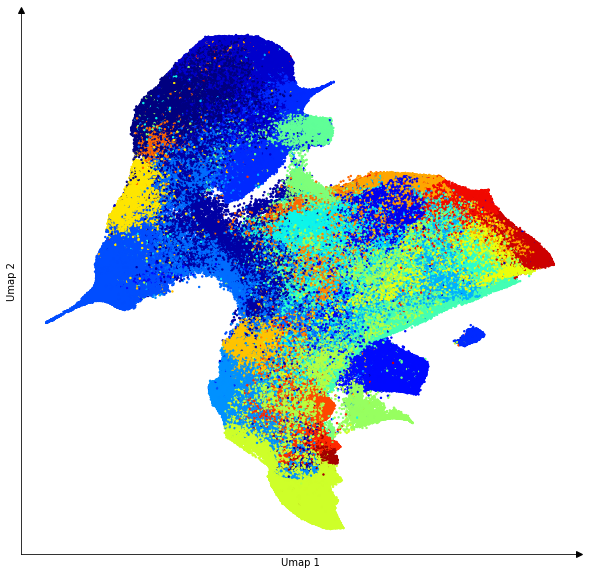

In [13]:
name = 'Umap'

fig, ax = plt.subplots(figsize=(10, 10))
X, Y = embeddings[:, 0], embeddings[:, 1]
ax.scatter(X, Y, c=parc_labels, s=2, cmap='jet')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Add arrow with spine
pos = ax.get_position()
ax.plot(pos.x1, pos.y0, ">k", transform=fig.transFigure, clip_on=False)
ax.plot(pos.x0, pos.y1, "^k", transform=fig.transFigure, clip_on=False)

# Add label
ax.set_xlabel(f'{name} 1')
ax.set_ylabel(f'{name} 2')

In [14]:
mapping = {}
i = 0
for dataset in df.ROI.unique():
    mapping[dataset] = i
    i += 1

dataset_num = np.array(list(map(mapping.get, df.ROI.tolist())))

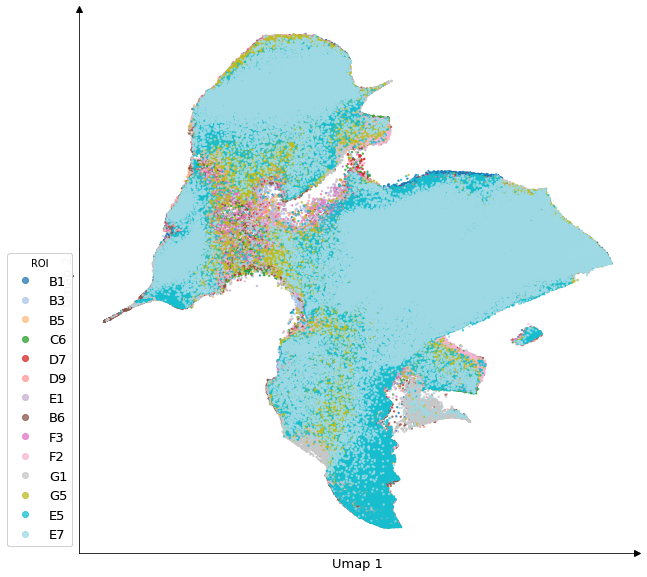

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
X, Y = embeddings[:, 0], embeddings[:, 1]
scatter = ax.scatter(X, Y, alpha=0.7, c=dataset_num, s=2, cmap='tab20')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Add arrow with spine
pos = ax.get_position()
ax.plot(pos.x1, pos.y0, ">k", transform=fig.transFigure, clip_on=False)
ax.plot(pos.x0, pos.y1, "^k", transform=fig.transFigure, clip_on=False)

# Add label
ft = 13
ax.set_xlabel(f'{name} 1', fontsize=ft)
ax.set_ylabel(f'{name} 2', fontsize=ft)

labels = list(df.ROI.unique())
legend1 = ax.legend(handles=scatter.legend_elements()[0], 
                    labels=[dataset[-2:] for dataset in labels],
                    bbox_to_anchor=(0, 0),
                    loc="lower right", 
                    title="ROI",
                   fontsize=ft)
ax.add_artist(legend1)

In [16]:
mapping_stage = {}
i = 0
for stage in df_metadata.Stage.unique():
    mapping_stage[stage] = i
    i += 1

dataset2num = df_metadata.Stage.map(mapping_stage.get).to_dict()
stage_num = np.array(list(map(dataset2num.get, dataset_num)))

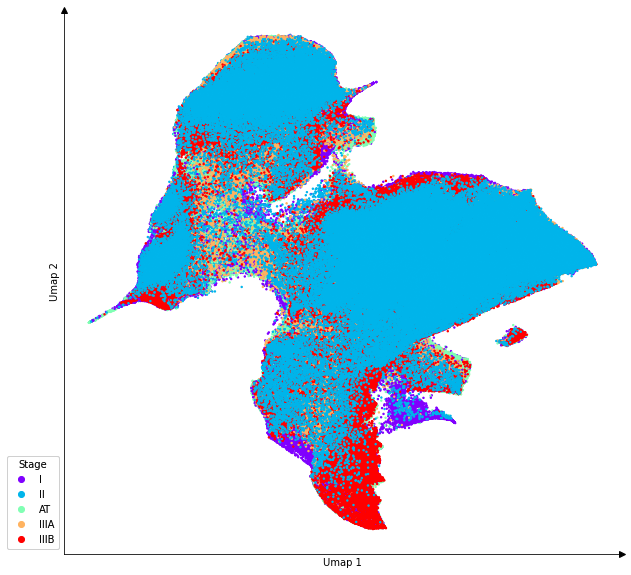

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
X, Y = embeddings[:, 0], embeddings[:, 1]
scatter = ax.scatter(X, Y, c=stage_num, s=2, cmap='rainbow')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Add arrow with spine
pos = ax.get_position()
ax.plot(pos.x1, pos.y0, ">k", transform=fig.transFigure, clip_on=False)
ax.plot(pos.x0, pos.y1, "^k", transform=fig.transFigure, clip_on=False)

# Add label
ax.set_xlabel(f'{name} 1')
ax.set_ylabel(f'{name} 2')

legend1 = ax.legend(handles=scatter.legend_elements()[0], 
                    labels=list(mapping_stage.keys()),
                    bbox_to_anchor=(0, 0),
                    loc="lower right", 
                    title="Stage")
ax.add_artist(legend1)

In [18]:
mapping_grade = {}
i = 0
for grade in df_metadata.Grades.unique():
    mapping_grade[grade] = i
    i += 1

dataset2num = df_metadata.Grades.map(mapping_grade.get).to_dict()
grade_num = np.array(list(map(dataset2num.get, dataset_num)))

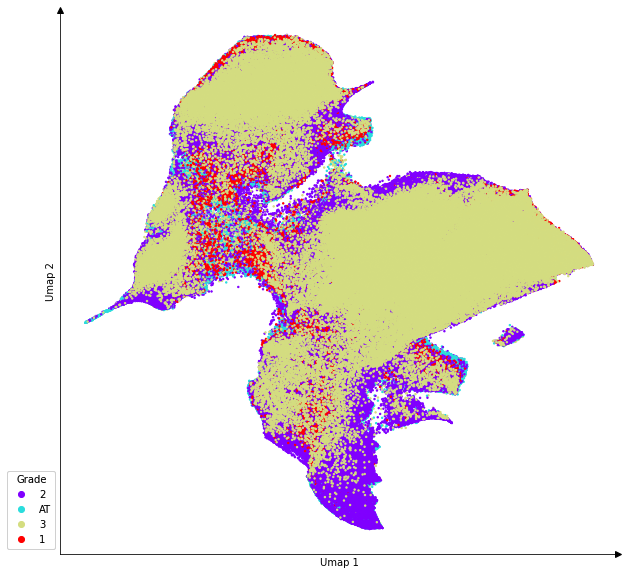

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
X, Y = embeddings[:, 0], embeddings[:, 1]
scatter = ax.scatter(X, Y, c=grade_num, s=2, cmap='rainbow')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Add arrow with spine
pos = ax.get_position()
ax.plot(pos.x1, pos.y0, ">k", transform=fig.transFigure, clip_on=False)
ax.plot(pos.x0, pos.y1, "^k", transform=fig.transFigure, clip_on=False)

# Add label
ax.set_xlabel(f'{name} 1')
ax.set_ylabel(f'{name} 2')

legend1 = ax.legend(handles=scatter.legend_elements()[0], 
                    labels=list(mapping_grade.keys()),
                    bbox_to_anchor=(0, 0),
                    loc="lower right", 
                    title="Grade")
ax.add_artist(legend1)

In [20]:
df.columns

Index(['SMA', 'Vimentin', 'PanKeratin', 'PDL1', 'CD44', 'FoxP3', 'CD4',
       'ECadherin', 'CD68', 'CD20', 'CD8a', 'PD1', 'GranzymeB', 'Ki67', 'Col1',
       'CD3', 'CD45RO', 'X', 'Y', 'ROI'],
      dtype='object')

Text(0, 0.5, 'Umap 2')

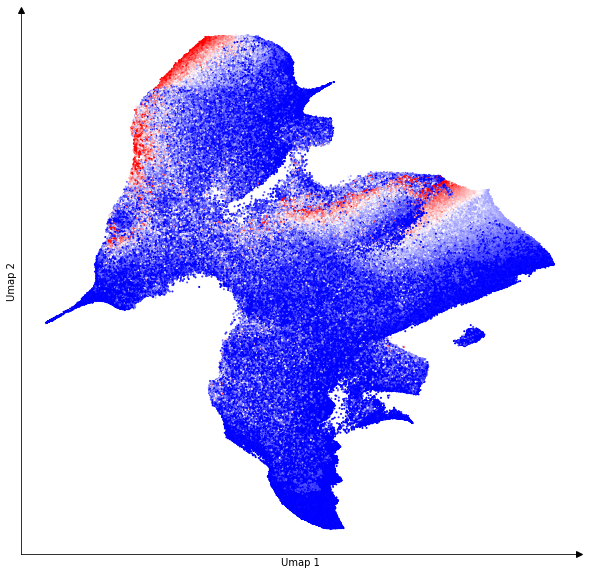

In [21]:
i = 2
name = 'Umap'

fig, ax = plt.subplots(figsize=(10, 10))
X, Y = embeddings[:, 0], embeddings[:, 1]
ax.scatter(X, Y, c=df.iloc[:,i].tolist(), s=1, cmap='bwr')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Add arrow with spine
pos = ax.get_position()
ax.plot(pos.x1, pos.y0, ">k", transform=fig.transFigure, clip_on=False)
ax.plot(pos.x0, pos.y1, "^k", transform=fig.transFigure, clip_on=False)

# Add label
ax.set_xlabel(f'{name} 1')
ax.set_ylabel(f'{name} 2')